In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Generating Linear Data
x_linear = np.linspace (0,10,50)
y_linear = 2 * x_linear + 5 + np.random.randn(50) # y = 2x + noise

In [33]:
#Generating Non-linear data
x_nonlinear = np.linspace (0,10,50)
y_nonlinear = 2 * np.sin(x_nonlinear) + np.random.randn(50) # y = 2x + noise

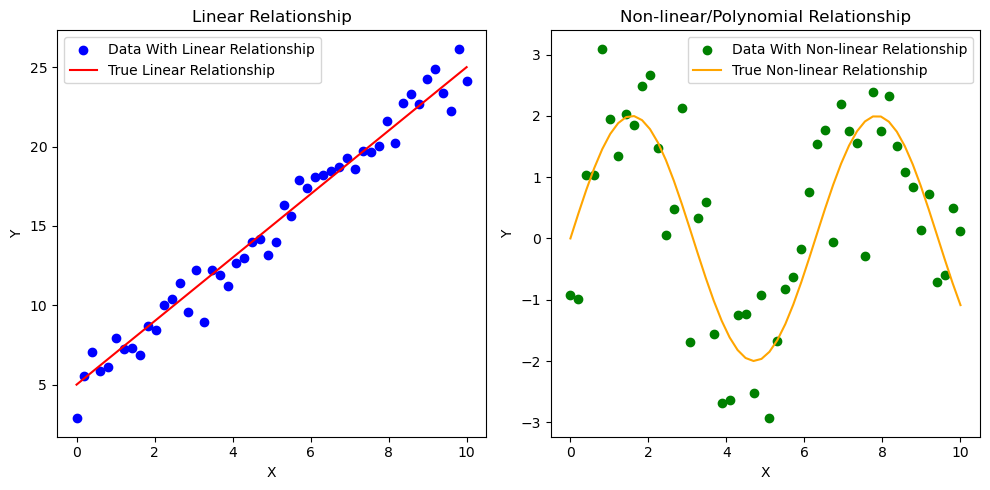

In [34]:
#linear
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_linear,y_linear,color='blue',label='Data With Linear Relationship')
plt.plot(x_linear, 2*x_linear + 5, color='red',label='True Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

# Non-linear
#linear
plt.subplot(1,2,2)
plt.scatter(x_nonlinear,y_nonlinear,color='green',label='Data With Non-linear Relationship')
plt.plot(x_nonlinear, 2*np.sin(x_nonlinear), color='orange',label='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear/Polynomial Relationship')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation Coefficients

In [35]:
correlation_linear = np.corrcoef(x_linear, y_linear)[0,1]
correlation_nonlinear = np.corrcoef(x_nonlinear, y_nonlinear)[0,1]

In [36]:
print('Correlation coefficient for linear relationship: ',correlation_linear)
print('Correlation coefficient for non-linear relationship: ',correlation_nonlinear)

Correlation coefficient for linear relationship:  0.9875625664722202
Correlation coefficient for non-linear relationship:  -0.029286416481041196


# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg1 = LinearRegression()
reg1.fit(x_linear.reshape(-1,1),y_linear)
# The .fit() method trains the model using the given input data.
# Without .reshape(-1, 1), the code won't work because scikit-learn requires a 2D input 
# for features. But x_linear is 1D

LinearRegression()

# The .score() method computes the coefficient of determination (R^2) of the model.
R^2 measures how well the model explains the variance in the target variable (y_linear):

In [39]:
reg1.score(x_linear.reshape(-1,1),y_linear)

0.9752798226971982

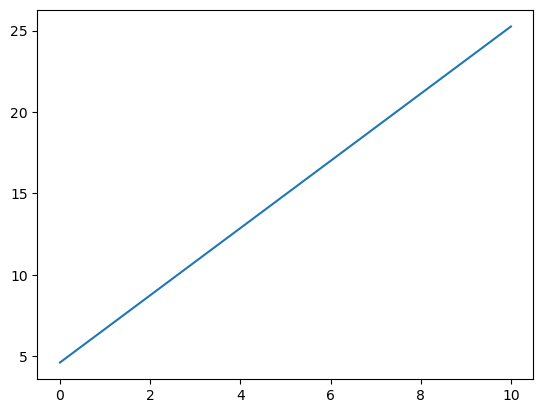

In [40]:
plt.plot(x_linear,reg1.predict(x_linear.reshape(-1,1)))

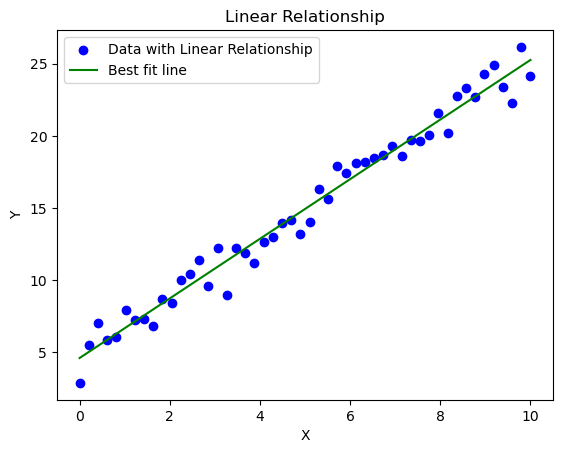

In [41]:
plt.scatter(x_linear, y_linear, color='blue',label='Data with Linear Relationship')
plt.plot(x_linear, reg1.predict(x_linear.reshape(-1,1)),color='green',label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()
plt.show()

# Non Linear

In [42]:
reg2=LinearRegression()

In [43]:
reg2.fit(x_nonlinear.reshape(-1,1), y_nonlinear)

LinearRegression()

In [44]:
reg2.score(x_nonlinear.reshape(-1,1),y_nonlinear)


0.0008576941903011281

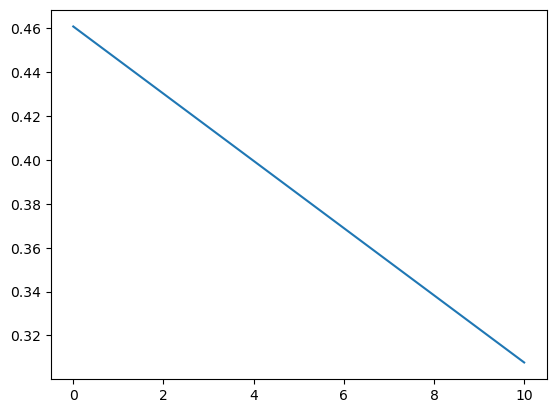

In [45]:
plt.plot(x_nonlinear, reg2.predict(x_nonlinear.reshape(-1,1)))

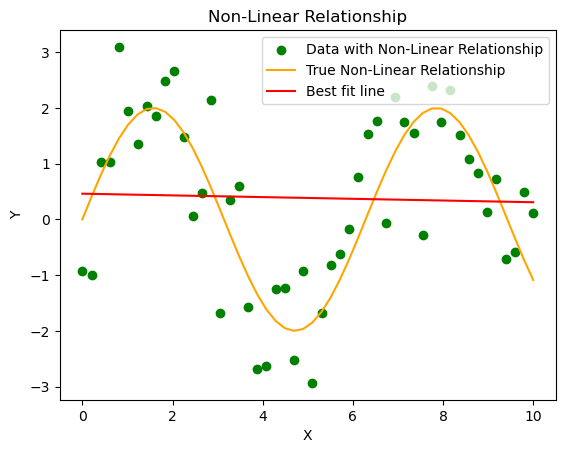

In [46]:
plt.scatter(x_nonlinear, y_nonlinear, color='green',label='Data with Non-Linear Relationship')
plt.plot(x_nonlinear, 2*np.sin(x_nonlinear),color='orange',label='True Non-Linear Relationship')
plt.plot(x_nonlinear, reg2.predict(x_nonlinear.reshape(-1,1)),color='red',label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Relationship')
plt.legend()
plt.show()

# Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
poly = PolynomialFeatures(degree=6)
X_poly= poly.fit_transform(x_nonlinear.reshape(-1,1))

In [79]:
X_poly.shape

(50, 7)

In [80]:
reg_poly=LinearRegression()

In [81]:
reg_poly.fit(X_poly,y_nonlinear)

LinearRegression()

In [82]:
reg_poly.score(X_poly,y_nonlinear)

0.7242280972124764

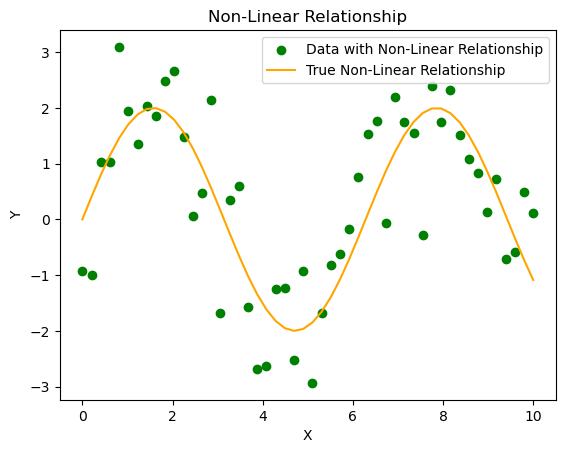

In [83]:
plt.scatter(x_nonlinear, y_nonlinear, color='green',label='Data with Non-Linear Relationship')
plt.plot(x_nonlinear, 2*np.sin(x_nonlinear),color='orange',label='True Non-Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Relationship')
plt.legend()
plt.show()

# Separate Train Test

In [88]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_poly,y_nonlinear,test_size=.30, random_state=1)

In [87]:
reg=LinearRegression()

In [89]:
reg.fit(xtrain,ytrain)

LinearRegression()

# testing score

In [90]:
reg.score(xtest,ytest)

0.6569867326118035

# training score

In [91]:
reg.score(xtrain,ytrain)

0.7013194540541252